In [1]:
%run rs2th_cwt_functions.ipynb

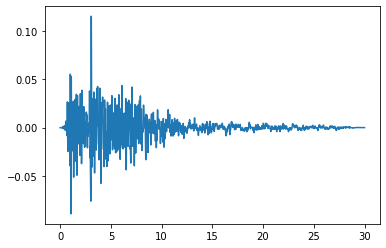

In [2]:
# Target Time History
# Read Acc. th
data = fileI('RSN454_MORGAN_GIL067.AT2');
th = np.zeros(len(data)*5);
idx = 0;
for i in range(len(data)):
    for j in range(5):
        th[idx] = data[i,j];
        idx += 1;
dt = 0.005;
N = len(th);
tmax = dt*N;
time = np.arange(0,tmax,dt);
plt.plot(time,th);

In [3]:
# Target Response Spectra
# RG 1.60
ft = np.array([0.10,  2.50, 9.00, 33.0, 100.0]);  # frequency table
rt = np.array([0.07,  3.13, 2.61,  1.0,   1.0]);  # response spectrum table

# log-log interp
freq = np.logspace(-1,2,100);
resp_spec = 10**np.interp(np.log10(freq),np.log10(ft),np.log10(rt));
resp_spec_u = resp_spec*1.3;
resp_spec_l = resp_spec/1.1;

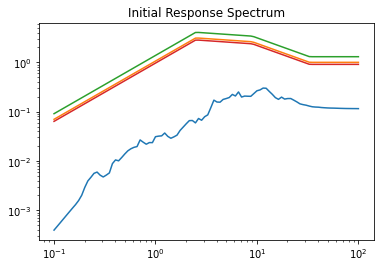

In [9]:
# Calculate response spectra of new time history for comparison
freq,rs = srs_sw_pa(freq,th,dr=0.05,dt=dt);
#  Plot the response spectrum
plt.loglog(freq,rs);
plt.loglog(freq,resp_spec);
plt.loglog(freq,resp_spec_u);
plt.loglog(freq,resp_spec_l);
plt.title('Initial Response Spectrum');

C:\Users\OWNER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\OWNER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\OWNER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\OWNER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


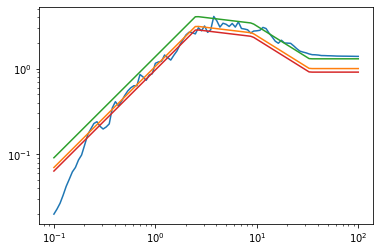

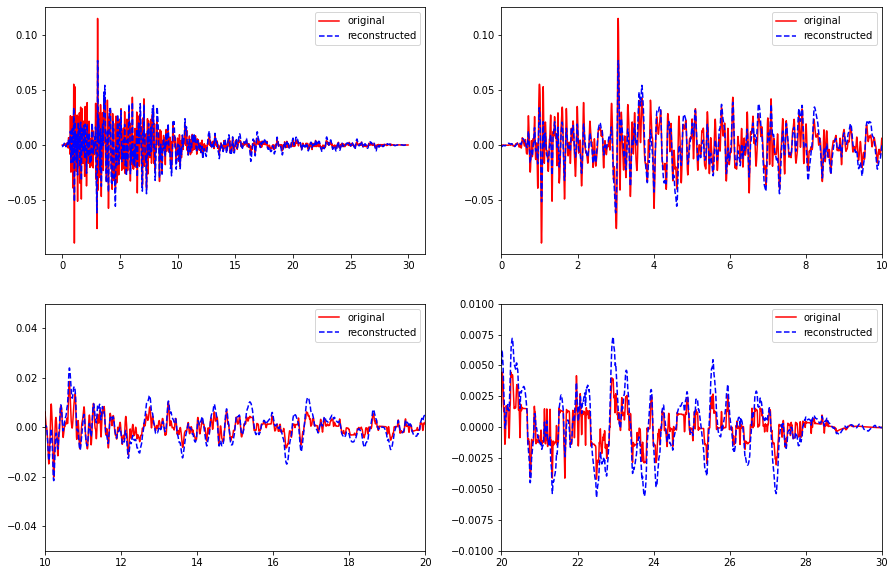

In [10]:
# 1. Calculate response spectra of time history
freq,rs = srs_sw_pa(freq,th,dr=0.05,dt=dt);
# 2. Calculate adjustment coefficient
m=freq[:-1]
n=freq[1:]
f_points = (m+n)/2
resp1 = 10**np.interp(np.log10(f_points),np.log10(ft),np.log10(rt));
resp2 = 10**np.interp(np.log10(f_points),np.log10(freq),np.log10(rs));
cof = resp1/resp2;
# 3. Wavelet decomosition of time history
a_out,ab_out,w_out,wb_out = cwt_newland1(ft=freq,k=100,time=time,th=th);
# 4. New time history reconstruction  with adjustment coefficient
a,ab,w,wb = a_out,ab_out,w_out,wb_out
lenm = len(a[:,0]);
lenk = len(a[0,:]);
lent = len(w[0,:,0]);
th1 = np.zeros(lent,'complex');
for i in range(lenm):
    for j in range(lenk):
        th1 += cof[i]*(a[i,j]*w[i,:,j]+ab[i,j]*wb[i,:,j]);
# 5. Calculate response spectra of new time history for comparison
freq,rs1 = srs_sw_pa(freq,th1,dr=0.05,dt=dt);
# 6. Plot the response spectrum
plt.loglog(freq,rs1);
plt.loglog(freq,resp_spec);
plt.loglog(freq,resp_spec_u);
plt.loglog(freq,resp_spec_l);

# 7. Normalize the new th using the ratio of norms of the time histories for comparison
new_th = th1*(np.linalg.norm(th)/np.linalg.norm(th1));

# 8. Plot time histories
plt.figure(figsize=(15,10));
plt.subplot(221);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.legend();
plt.subplot(222);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(0,10);
plt.legend();
plt.subplot(223);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(10,20);
plt.ylim(-0.05,0.05);
plt.legend();
plt.subplot(224);
plt.plot(time,th,color='red',linestyle='solid',label='original');
plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
plt.xlim(20,30);
plt.ylim(-0.01,0.01);
plt.legend();

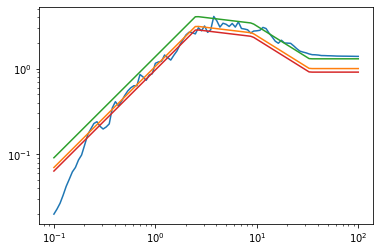

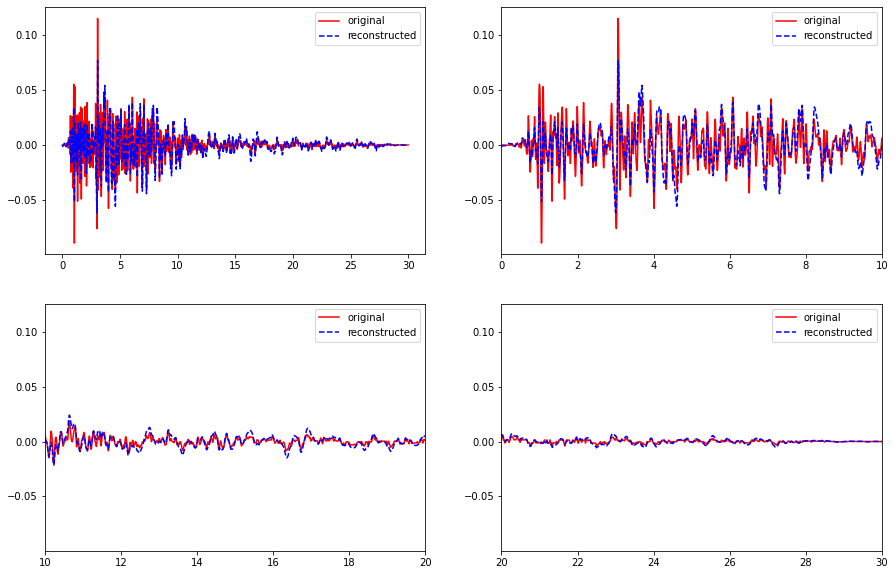

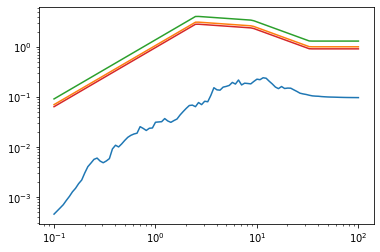

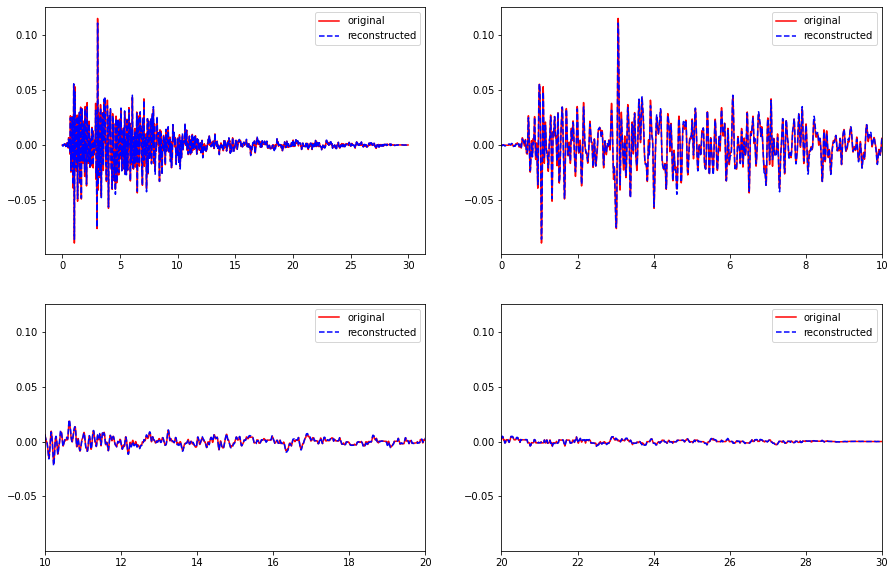

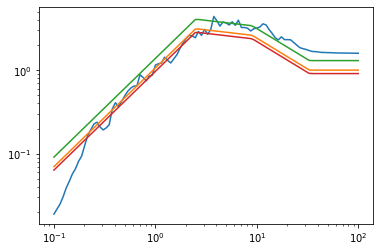

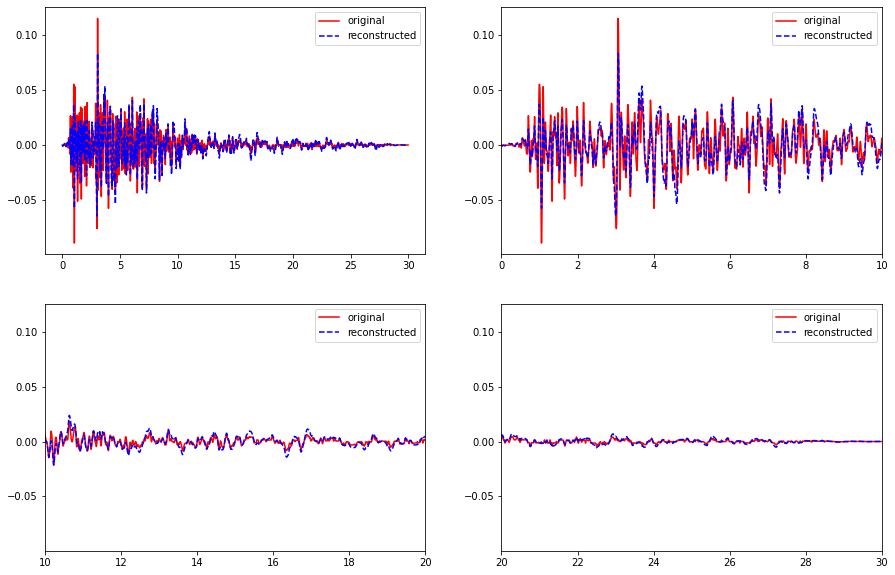

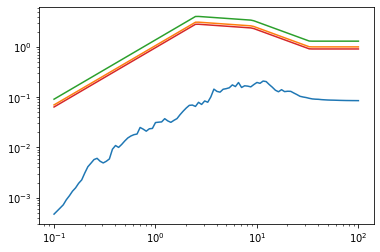

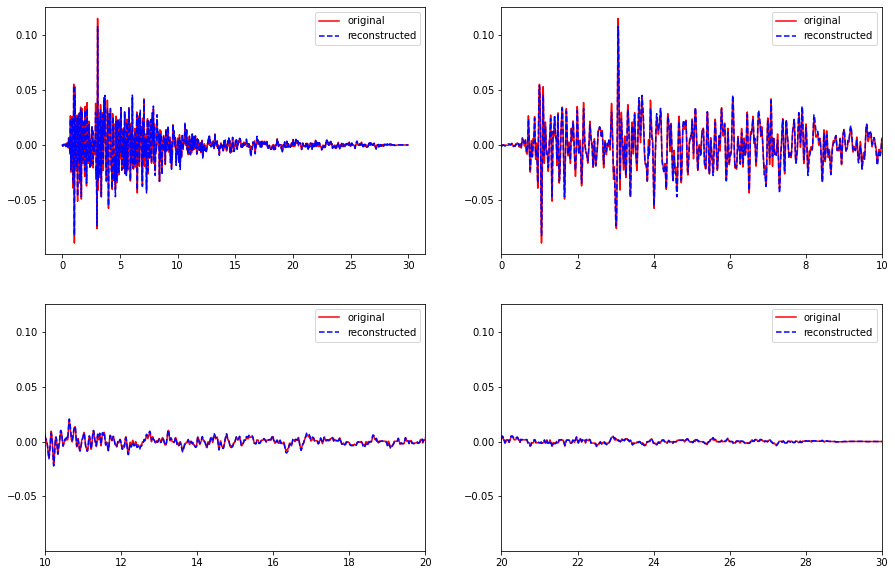

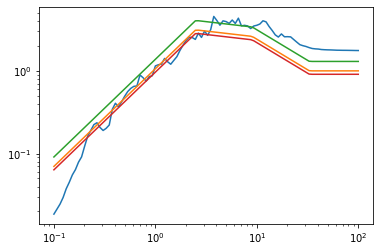

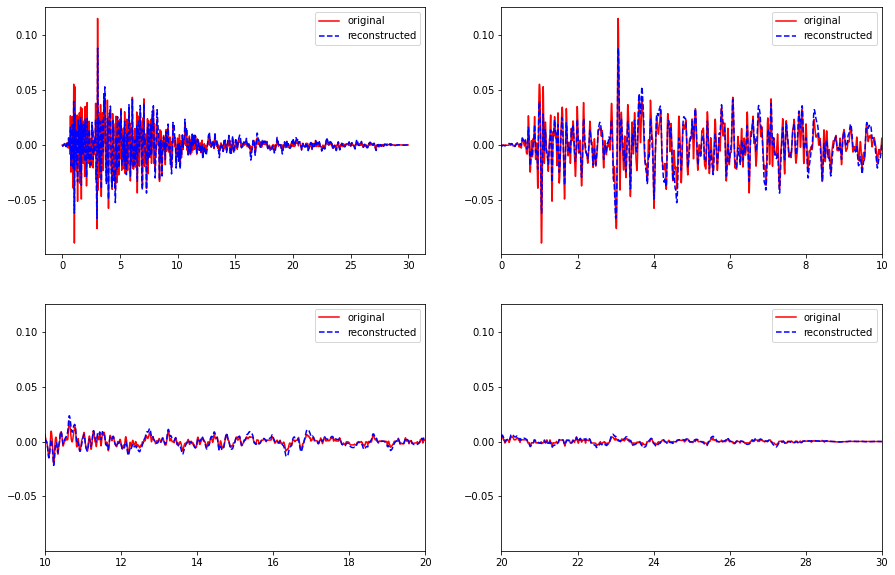

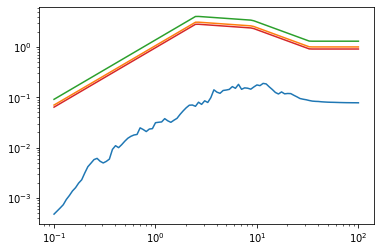

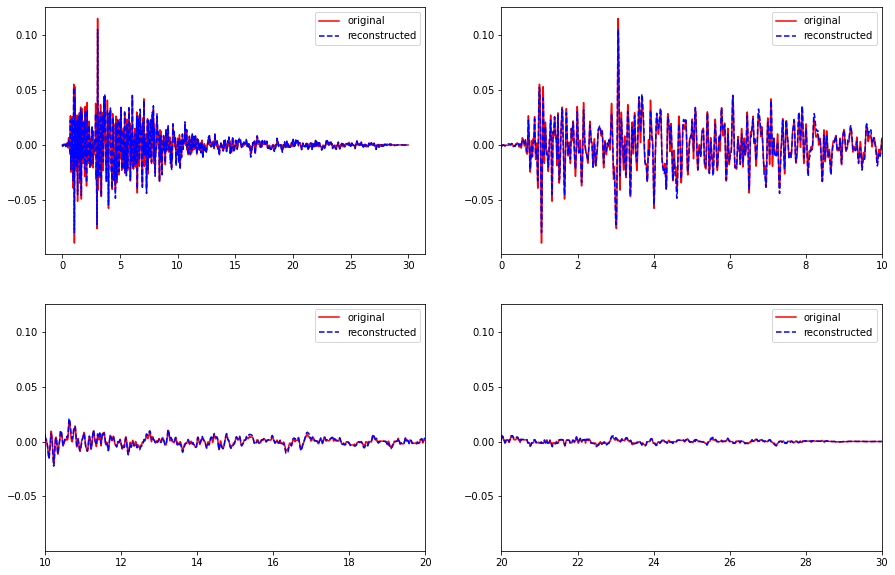

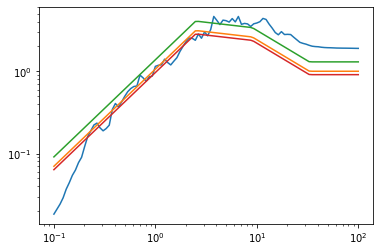

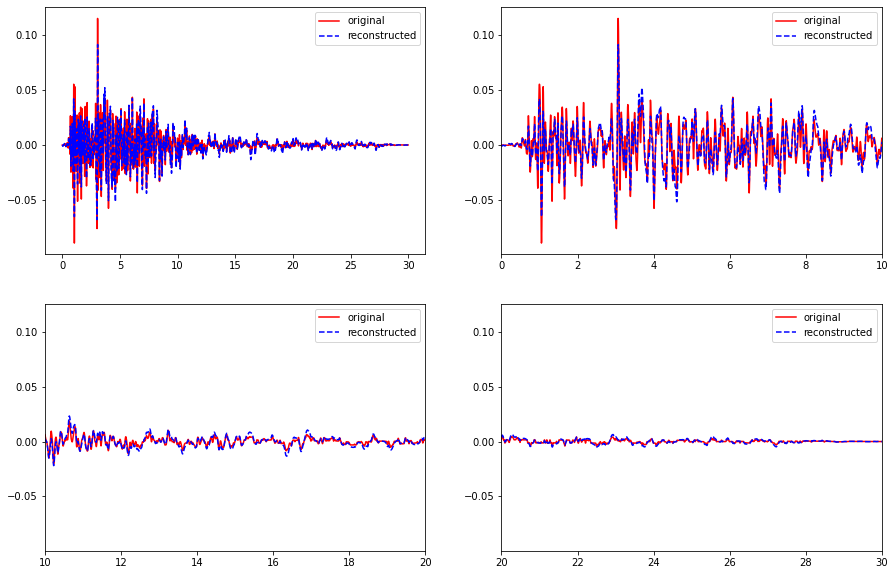

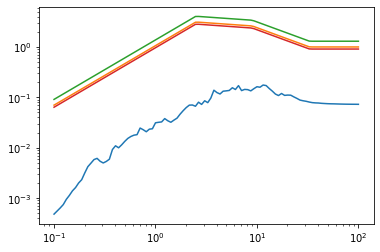

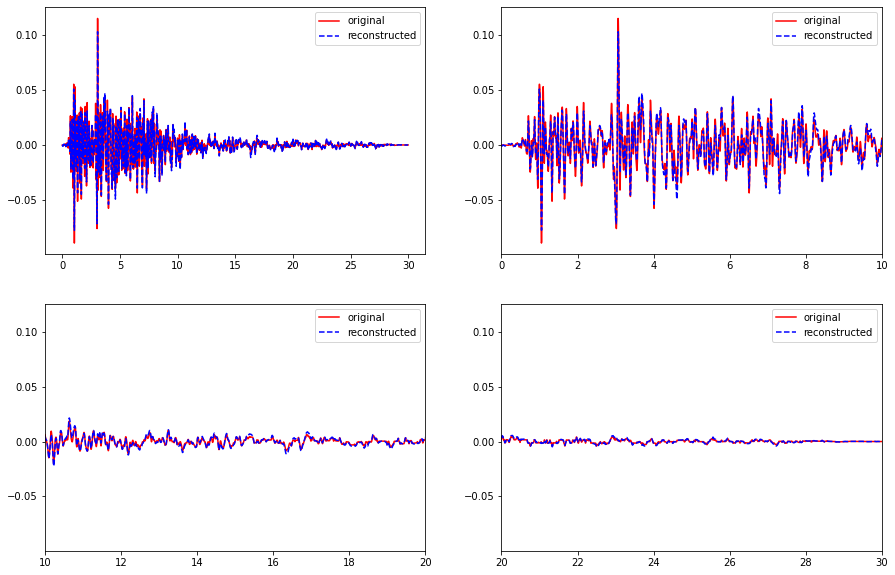

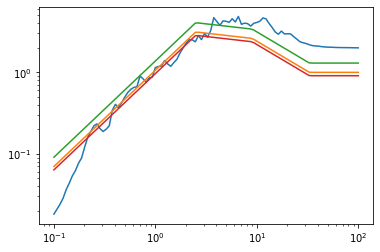

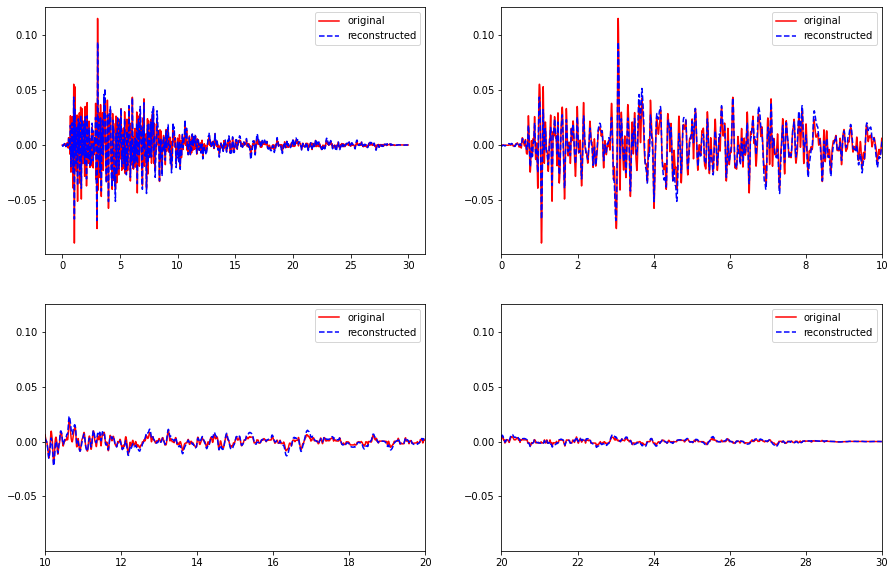

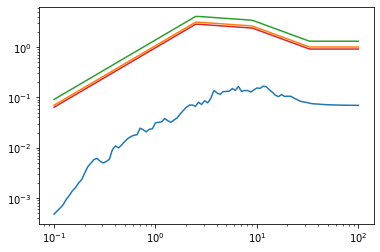

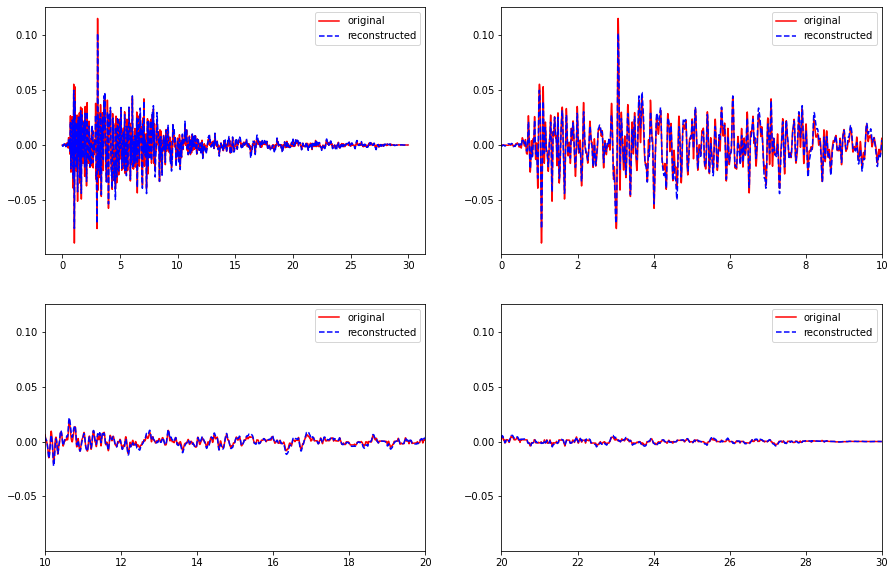

In [12]:
# Iteration
it = 10;
th1 = np.copy(th);
for iteration in range(it):
    # 1. Calculate response spectra of time history
    freq,rs = srs_sw_pa(freq,th1,dr=0.05,dt=dt);
    # 2. Calculate adjustment coefficient
    m=freq[:-1]
    n=freq[1:]
    f_points = (m+n)/2
    resp1 = 10**np.interp(np.log10(f_points),np.log10(ft),np.log10(rt));
    resp2 = 10**np.interp(np.log10(f_points),np.log10(freq),np.log10(rs));
    cof = resp1/resp2;
    # 3. Wavelet decomosition of time history
    a_out,ab_out,w_out,wb_out = cwt_newland1(ft=freq,k=100,time=time,th=th);
    # 4. New time history reconstruction  with adjustment coefficient
    a,ab,w,wb = a_out,ab_out,w_out,wb_out
    lenm = len(a[:,0]);
    lenk = len(a[0,:]);
    lent = len(w[0,:,0]);
    th1 = np.zeros(lent,'complex');
    for i in range(lenm):
        for j in range(lenk):
            th1 += cof[i]*(a[i,j]*w[i,:,j]+ab[i,j]*wb[i,:,j]);
    th1 = th1.real;
    # 5. Calculate response spectra of new time history for comparison
    freq,rs1 = srs_sw_pa(freq,th1,dr=0.05,dt=dt);
    # 6. Plot the response spectrum
    plt.figure();
    plt.loglog(freq,rs1);
    plt.loglog(freq,resp_spec);
    plt.loglog(freq,resp_spec_u);
    plt.loglog(freq,resp_spec_l);
    
    # 7. Normalize the new th using the ratio of norms of the time histories for comparison
    new_th = th1*(np.linalg.norm(th)/np.linalg.norm(th1));
    
    # 8. Plot time histories
    plt.figure(figsize=(15,10));
    plt.subplot(221);
    plt.plot(time,th,color='red',linestyle='solid',label='original');
    plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
    plt.legend();
    plt.subplot(222);
    plt.plot(time,th,color='red',linestyle='solid',label='original');
    plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
    plt.xlim(0,10);
    plt.legend();
    plt.subplot(223);
    plt.plot(time,th,color='red',linestyle='solid',label='original');
    plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
    plt.xlim(10,20);
    #plt.ylim(-0.05,0.05);
    plt.legend();
    plt.subplot(224);
    plt.plot(time,th,color='red',linestyle='solid',label='original');
    plt.plot(time,new_th,color='blue',linestyle='dashed',label='reconstructed');
    plt.xlim(20,30);
    #plt.ylim(-0.01,0.01);
    plt.legend();